In [1]:
from ecgprep import preprocess, read_ecg
import argparse
import h5py
import pandas as pd
import tqdm
import os
import matplotlib.pyplot as plt

In [2]:
input_file = 'RECORDS.txt'
root_dir = 'ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.1'
out_file = 'ptbxl.h5'

fmt = 'wfdb'

new_freq = 400
new_len = 4096
scale = 2
use_all_leads = True
remove_baseline = False
remove_powerline = None

# before

In [3]:
all_leads = ['DI', 'DII', 'DIII', 'AVR', 'AVL', 'AVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6']

In [4]:
files = pd.read_csv(input_file, header=None).values.flatten()
folder = root_dir
n = len(files)

In [5]:
for i, f in enumerate(tqdm.tqdm(files)):
    break
i, f

  0%|          | 0/21837 [00:00<?, ?it/s]


(0, 'records500/00000/00001_hr')

In [6]:
ecg, sample_rate, leads = read_ecg.read_ecg(os.path.join(folder, f), format = fmt)
ecg, sample_rate, leads

(array([[-0.115, -0.115, -0.115, ...,  0.21 ,  0.21 ,  0.21 ],
        [-0.05 , -0.05 , -0.05 , ...,  0.205,  0.205,  0.205],
        [ 0.065,  0.065,  0.065, ..., -0.005, -0.005, -0.005],
        ...,
        [-0.035, -0.035, -0.035, ...,  0.185,  0.185,  0.185],
        [-0.035, -0.035, -0.035, ...,  0.17 ,  0.17 ,  0.17 ],
        [-0.075, -0.075, -0.075, ...,  0.18 ,  0.18 ,  0.18 ]]),
 500,
 ['I', 'II', 'III', 'AVR', 'AVL', 'AVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6'])

In [7]:
ecg_preprocessed, new_rate, new_leads = preprocess.preprocess_ecg(ecg, sample_rate, all_leads, # different lead names
                                                                          new_freq=new_freq,
                                                                          new_len=new_len,
                                                                          scale=scale,
                                                                          use_all_leads=use_all_leads,
                                                                          remove_baseline=remove_baseline,
                                                                          remove_powerline=remove_powerline)
ecg_preprocessed, new_rate, new_leads

(array([[-0.20689032, -0.23780874, -0.22579928, ...,  0.        ,
          0.        ,  0.        ],
        [-0.08997755, -0.10338924, -0.09819476, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.11691278,  0.1344195 ,  0.12760452, ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [-0.06298074, -0.07238441, -0.06871614, ...,  0.        ,
          0.        ,  0.        ],
        [-0.06302623, -0.07231847, -0.06882296, ...,  0.        ,
          0.        ,  0.        ],
        [-0.13503723, -0.15496579, -0.14746622, ...,  0.        ,
          0.        ,  0.        ]]),
 400,
 ['DI',
  'DII',
  'DIII',
  'AVR',
  'AVL',
  'AVF',
  'V1',
  'V2',
  'V3',
  'V4',
  'V5',
  'V6'])

In [10]:
h5f = h5py.File(out_file, 'w')
x = None

In [ ]:
for i, f in enumerate(tqdm.tqdm(files)):
    ecg, sample_rate, leads = read_ecg.read_ecg(os.path.join(folder, f), format=fmt)
    ecg_preprocessed, new_rate, new_leads = preprocess.preprocess_ecg(ecg, sample_rate, leads,
                                                                            new_freq=new_freq,
                                                                            new_len=new_len,
                                                                            scale=scale,
                                                                            use_all_leads=use_all_leads,
                                                                            remove_baseline=remove_baseline,
                                                                            remove_powerline=remove_powerline)
    if x is None:
        n_leads, n_samples = ecg_preprocessed.shape
        x = h5f.create_dataset('tracings', (n, n_samples, n_leads), dtype='f8')
        id = h5f.create_dataset('exam_id', (n,), dtype='i4')
    x[i, :, :] = ecg_preprocessed.T
    id[i] = int(f.split('/')[-1][:-3])

In [17]:
int(f.split('/')[-1][:-3])

1

In [19]:
h5f.close()

# after

In [9]:
hdf5_file = h5py.File(out_file, "r")

In [10]:
i = 12581
hdf5_file['tracings'][i].shape, hdf5_file['tracings'][i]

((4096, 12),
 array([[0.13510049, 0.26102583, 0.12592534, ..., 0.35105642, 0.21603225,
         0.18008271],
        [0.15469062, 0.29953873, 0.14484811, ..., 0.40262598, 0.24769885,
         0.20639324],
        [0.14869104, 0.28512127, 0.13643023, ..., 0.38359708, 0.2361912 ,
         0.19682471],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]]))

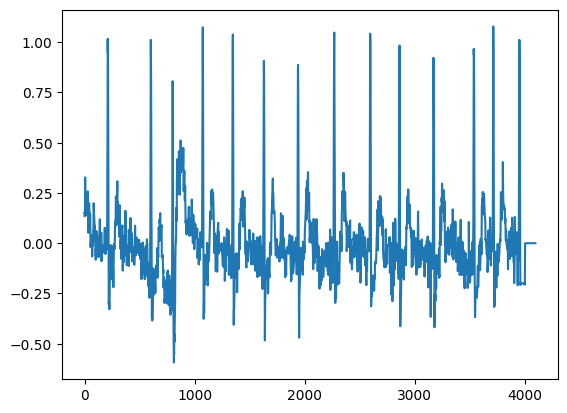

In [11]:
plt.plot(hdf5_file['tracings'][i, :, 0])

In [12]:
hdf5_file.close()